**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

In [129]:
import re
import pandas as pd

In [130]:
# ваш код
news = [
    "A catastrophic failure in the Hydro-Quebec transmission system has triggered a cascading blackout affecting millions from Toronto to Boston. Officials report at least 12 fatalities linked to the outage, primarily from hospital equipment failures and traffic accidents. Emergency services are overwhelmed as cities enter a second night without power in sub-zero temperatures. The cause is under investigation, with initial data pointing to a cyber-attack on grid control systems. This is an unprecedented national security and humanitarian crisis, the Canadian Prime Minister stated.",
    "The JT-60SA tokamak, a joint EU-Japan project, has successfully sustained a plasma reaction for 300 seconds while achieving a net energy gain (Q>1.2), a world record. Scientists hailed the milestone as the most concrete step yet toward viable commercial fusion power. The stable, long-duration pulse proves key containment technologies can work. This isn't just a scientific experiment anymore; it's an engineering blueprint, said the project lead. Global energy firms have already announced increased investment in fusion startups.",
    "In a historic ceremony in Bogotá, the government and the National Liberation Army (ELN) signed a comprehensive peace agreement, formally ending a 60-year armed conflict. The deal includes cease-fire verification, guerrilla demobilization and reintegration, and rural development programs. UN officials praised the accord as a model for negotiated solutions. The last remaining armed group in Colombia is now set to transition into a political party, though challenges in implementation remain.",
    "A farm worker in Argentina has been confirmed with a severe H5N1 infection, marking the first human case of a new clade of the virus that shows genetic markers for efficient mammalian transmission. The patient is in critical condition. While no human-to-human spread is confirmed, the WHO has raised its pandemic alert level and urged member states to review preparedness plans. The virus is changing; our vigilance must change faster, a WHO spokesperson warned.",
    "The European Parliament has passed the AI Liability Directive, making developers and operators of high-risk AI systems legally liable for damages by default. The law covers everything from hiring algorithms to autonomous vehicles. Companies must now prove their AI was not at fault in cases of harm, reversing the traditional burden of proof. The tech industry warns this will stifle innovation, while consumer advocates call it a vital step for the digital age.",
    "A cyber-attack on the Aadhaar database's backup servers has resulted in the theft of biometric data—including fingerprints and iris scans—linked to half a billion Indian identities. The government has confirmed the breach but downplayed risks, stating core encryption remains intact. Cybersecurity experts call it a digital catastrophe of generational scale, as biometric data is immutable. Fears of sophisticated identity fraud and state-level espionage are mounting.",
    "The Kenyan government has declared a national disaster and deployed the military to coordinate logistics in northern regions where the UN has officially declared a famine. Five consecutive failed rainy seasons have decimated livestock and crops, displacing over 2 million people. Aid agencies accuse the government of a slow response, while corruption scandals plague the relief fund. We are witnessing a tragedy in slow motion, a regional UN coordinator stated.",
    "State-run mining firm Korea Resources Corporation announced the discovery of a massive deposit of rare earth minerals, including dysprosium and neodymium, critical for EVs and high-tech weapons. Estimated to meet global demand for decades, the find in the Gangwon province could drastically shift supply chains away from China. Shares in Chinese rare earth firms plummeted on the news, while Korean tech conglomerates saw a sharp rally.",
    "California has become the first U.S. state to legislate a right to disconnect, prohibiting employers from contacting staff outside of working hours except for genuine emergencies. The law, inspired by French and Portuguese models, fines companies for violations. It aims to combat burnout in the always-on work culture of the tech era. Business groups plan to challenge the law in court, arguing it undermines flexibility and global competitiveness.",
    "Using LIDAR technology, an international team has mapped a vast, complex urban settlement in the Bolivian Amazon, dating to roughly 1500 years ago. The discovery features pyramids, canals, and agricultural networks supporting a population in the hundreds of thousands. It challenges the long-held view of the Amazon as a pristine wilderness with only small, nomadic tribes. This was a cradle of civilization we knew nothing about, the lead archaeologist said."
]


In [131]:
!pip install gensim

In [132]:
import string
import re
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec

nltk.download('punkt_tab')

# Загрузка моделей spaCy
nlp_en = spacy.load("en_core_web_sm")

# Загрузка стоп-слов
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
# Предобработка текста
def normalize_text(text):
  normal_text = []
  for sentence in text:
      sentence = sentence.lower()
      sentence = re.sub(r'[^\w\s]', ' ', sentence)
      sentence = sentence.replace("  ", " ")
      tokens = sentence.split()
      filtered_tokens = [token for token in tokens if token not in english_stopwords]
      sentence = ' '.join(filtered_tokens)
      # Лемматизация
      doc = nlp_en(sentence)
      lemmas = [token.lemma_ for token in doc if token.is_alpha]
      sentence = ' '.join(lemmas)
      normal_text.append(sentence)
  return normal_text
documents = normalize_text(news)
print(documents)

  # Вывод предобработанных документов
print("Предобработанные документы:")
for i, doc in enumerate(documents, 1):
    print(f"Документ {i}: {doc}")

['catastrophic failure hydro quebec transmission system trigger cascade blackout affect millions toronto boston official report least fatality link outage primarily hospital equipment failure traffic accident emergency service overwhelm city enter second night without power sub zero temperature cause investigation initial datum point cyber attack grid control system unprecedented national security humanitarian crisis canadian prime minister state', 'jt tokamak joint eu japan project successfully sustain plasma reaction second achieve net energy gain q world record scientist hail milestone concrete step yet toward viable commercial fusion power stable long duration pulse prove key containment technology work scientific experiment anymore engineering blueprint say project lead global energy firm already announce increase investment fusion startup', 'historic ceremony bogotá government national liberation army eln sign comprehensive peace agreement formally end year armed conflict deal in

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

In [135]:
# Модель мешка слов
# Создание векторизатора
count_vectorizer = CountVectorizer()

# Обучение векторизатора и преобразование документов
bow_matrix = count_vectorizer.fit_transform(documents)

# Получение списка фичей (слов)
feature_names = count_vectorizer.get_feature_names_out()

# Преобразование разреженной матрицы в плотную для наглядности
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=feature_names,
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

# Вывод матрицы Bag of Words
print("Матрица Bag of Words:")
print(bow_df)

Матрица Bag of Words:
             aadhaar  accident  accord  accuse  achieve  advocate  affect  \
Документ 1         0         1       0       0        0         0       1   
Документ 2         0         0       0       0        1         0       0   
Документ 3         0         0       1       0        0         0       0   
Документ 4         0         0       0       0        0         0       0   
Документ 5         0         0       0       0        0         1       0   
Документ 6         1         0       0       0        0         0       0   
Документ 7         0         0       0       1        0         0       0   
Документ 8         0         0       0       0        0         0       0   
Документ 9         0         0       0       0        0         0       0   
Документ 10        0         0       0       0        0         0       0   

             age  agency  ago  ...  weapon  wilderness  without  witness  \
Документ 1     0       0    0  ...       0           0

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer # Для создания TF-IDF

In [137]:
# Модель TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Обучение векторизатора и преобразование документов
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Преобразование в DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

# Вывод матрицы TF-IDF
print("Матрица TF-IDF:")
print(tfidf_df)

Матрица TF-IDF:
              aadhaar  accident    accord    accuse   achieve  advocate  \
Документ 1   0.000000  0.134552  0.000000  0.000000  0.000000   0.00000   
Документ 2   0.000000  0.000000  0.000000  0.000000  0.133035   0.00000   
Документ 3   0.000000  0.000000  0.144766  0.000000  0.000000   0.00000   
Документ 4   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
Документ 5   0.000000  0.000000  0.000000  0.000000  0.000000   0.14253   
Документ 6   0.144861  0.000000  0.000000  0.000000  0.000000   0.00000   
Документ 7   0.000000  0.000000  0.000000  0.142938  0.000000   0.00000   
Документ 8   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
Документ 9   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
Документ 10  0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   

               affect      age    agency       ago  ...   weapon  wilderness  \
Документ 1   0.134552  0.00000  0.000000  0.000000  ...  0.00000    0.000000  

In [138]:
bow_sum = np.sum(bow_matrix.toarray(), axis=0)


word_bow_dict = dict(zip(feature_names, bow_sum))

top_bow_words = sorted(word_bow_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Топ-10 слов по всей коллекции ===\n")
print("Топ-10 слов по BOW (самые частые в коллекции):")
for word, count in top_bow_words:
    print(f"- {word}: {count} раз")

tfidf_sum = np.sum(tfidf_matrix.toarray(), axis=0)

word_tfidf_dict = dict(zip(feature_names, tfidf_sum))

top_tfidf_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-10 слов по TF-IDF (с наибольшим весом по всей коллекции):")
for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")

print("\nСравнение топ-10 слов:")
bow_words = [word for word, _ in top_bow_words]
tfidf_words = [word for word, _ in top_tfidf_words]

common_words = set(bow_words) & set(tfidf_words)
bow_only = set(bow_words) - common_words
tfidf_only = set(tfidf_words) - common_words

if common_words:
    print(f"Общие слова в обоих топ-10: {', '.join(common_words)}")
if bow_only:
    print(f"Только в BOW топ-10: {', '.join(bow_only)}")
if tfidf_only:
    print(f"Только в TF-IDF топ-10: {', '.join(tfidf_only)}")


=== Топ-10 слов по всей коллекции ===

Топ-10 слов по BOW (самые частые в коллекции):
- state: 7 раз
- government: 4 раз
- tech: 4 раз
- ai: 3 раз
- challenge: 3 раз
- confirm: 3 раз
- datum: 3 раз
- firm: 3 раз
- global: 3 раз
- human: 3 раз

Топ-10 слов по TF-IDF (с наибольшим весом по всей коллекции):
- state: 0.5359
- government: 0.4280
- ai: 0.4276
- tech: 0.4262
- human: 0.4162
- law: 0.3833
- work: 0.3752
- remain: 0.3693
- un: 0.3661
- datum: 0.3607

Сравнение топ-10 слов:
Общие слова в обоих топ-10: state, human, datum, government, ai, tech
Только в BOW топ-10: firm, global, confirm, challenge
Только в TF-IDF топ-10: remain, un, work, law


In [139]:
# Функция для предобработки текста
def preprocess_text(text):
    """Функция для базовой обработки текста"""
    # Преобразуем в нижний регистр
    text = text.lower()

    # Удаляем пунктуацию (оставляем только буквы и пробелы)
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация (разбиение на слова)
    tokens = word_tokenize(text)

    return tokens

# Предобрабатываем каждое предложение в корпусе
processed_corpus = [preprocess_text(sentence) for sentence in documents]

In [140]:
model = Word2Vec(
    sentences=processed_corpus,  # Наш корпус предложений
    vector_size=100,  # Размерность векторов (обычно от 100 до 300)
    window=5,  # Размер контекстного окна (сколько слов слева и справа учитывать)
    min_count=1,  # Минимальная частота слова для включения в модель (здесь 1, т.к. у нас маленький корпус)
    sg=1,  # 1 = Skip-gram, 0 = CBOW
    hs=0,  # 0 = использовать negative sampling, 1 = иерархический softmax
    negative=5,  # Количество "негативных" семплов для negative sampling
    ns_exponent=0.75,  # Экспонента для отрицательного сэмплирования
    cbow_mean=1,  # Для CBOW: 1 = использовать среднее, 0 = сумму
    alpha=0.025,  # Начальная скорость обучения
    min_alpha=0.0001,  # Минимальная скорость обучения
    seed=42,  # Для воспроизводимости результатов
    workers=4,  # Количество потоков для параллельного обучения
)

In [141]:
def sentence_to_vector(sentence, model):
    """
    Преобразует предложение в вектор, усредняя векторы слов

    Args:
        sentence: Исходное предложение
        model: Word2Vec

    Returns:
        Вектор предложения
    """
    # Предобрабатываем предложение
    words = preprocess_text(sentence)

    # Отбираем только слова, которые есть в модели
    words = [word for word in words if word in model.wv]

    if not words:
        # Если не нашлось ни одного известного слова, вернем нулевой вектор
        return np.zeros(model.vector_size)

    # Получаем векторы слов
    word_vectors = [model.wv[word] for word in words]

    # Возвращаем средний вектор
    return np.mean(word_vectors, axis=0)

# Создаем векторные представления для всех предложений корпуса
sentence_vectors = [sentence_to_vector(sentence, model) for sentence in documents]

def find_similar_sentences(query, corpus, model, top_n=10):
    # Преобразуем запрос в вектор
    query_vector = sentence_to_vector(query, model)
    query_norm = np.linalg.norm(query_vector)
    if query_norm == 0:
    # В запросе не оказалось слов из словаря модели
        return []

    similarities = []
    for i, sentence_vector in enumerate(sentence_vectors):
        denom = query_norm * np.linalg.norm(sentence_vector)
        if denom == 0:
            similarity = 0.0
        else:
            similarity = float(np.dot(query_vector, sentence_vector) / denom)

        similarities.append((documents[i], similarity))

    # Сортируем по убыванию сходства
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Возвращаем top_n результатов
    return similarities[:top_n]

print("\n=== Поиск похожих предложений ===")
for query in news:
    # Чтобы запрос не был слишком громозким
    tokens = query.split()
    query = " ".join(tokens)
    print(f"\nЗапрос: {query}")
    similar = find_similar_sentences(query, documents, model)
    for i, (sentence, score) in enumerate(similar, 1):
        print(f"{i}. {sentence[:20]} (сходство: {score:.4f})")


=== Поиск похожих предложений ===

Запрос: A catastrophic failure in the Hydro-Quebec transmission system has triggered a cascading blackout affecting millions from Toronto to Boston. Officials report at least 12 fatalities linked to the outage, primarily from hospital equipment failures and traffic accidents. Emergency services are overwhelmed as cities enter a second night without power in sub-zero temperatures. The cause is under investigation, with initial data pointing to a cyber-attack on grid control systems. This is an unprecedented national security and humanitarian crisis, the Canadian Prime Minister stated.
1. catastrophic failure (сходство: 0.8203)
2. european parliament  (сходство: 0.1917)
3. cyber attack aadhaar (сходство: 0.1788)
4. state run mining fir (сходство: 0.1550)
5. use lidar technology (сходство: 0.1093)
6. farm worker argentin (сходство: 0.1092)
7. historic ceremony bo (сходство: 0.0692)
8. kenyan government de (сходство: 0.0481)
9. california become fi (сход

In [142]:
docs_clean = [" ".join(preprocess_text(d)) for d in documents]
labels = [f"Док {i+1}" for i in range(len(docs_clean))]


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow = CountVectorizer()
X_bow = bow.fit_transform(docs_clean)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(docs_clean)


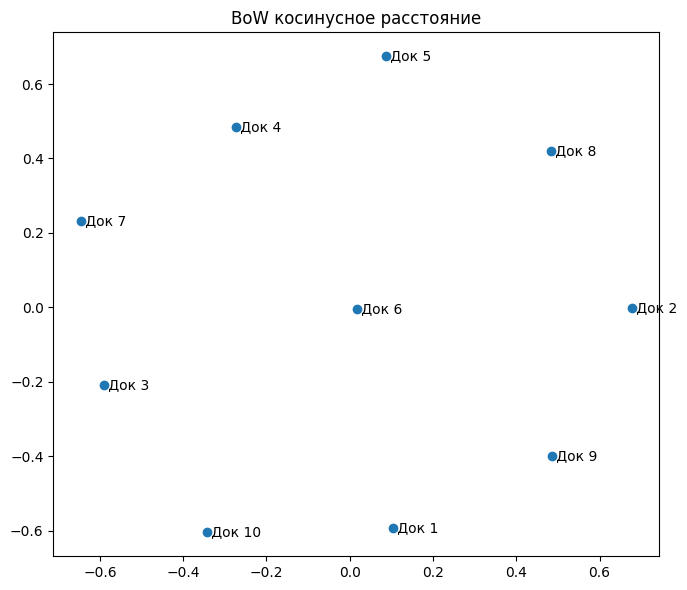

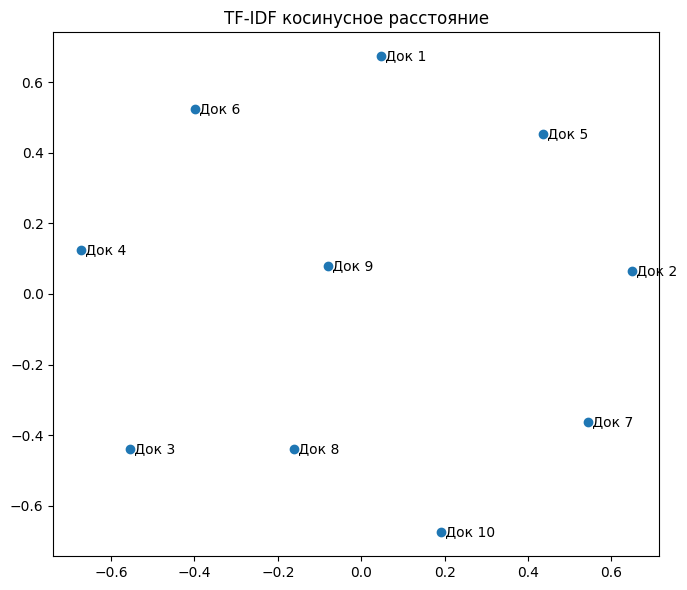

In [143]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_distances

def plot_mds(X, labels, title):
    D = cosine_distances(X)
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=42).fit_transform(D)

    plt.figure(figsize=(7,6))
    plt.scatter(coords[:,0], coords[:,1])
    for i, lab in enumerate(labels):
        plt.text(coords[i,0], coords[i,1], " " + lab, va="center")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_mds(X_bow, labels, "BoW косинусное расстояние")
plot_mds(X_tfidf, labels, "TF-IDF косинусное расстояние")

Разница между BoW и TF-IDF почти нет. Связано это с тем, что слова в документах почти не повторялись и оба метода не смогли на полную проявить себя и выделиться на фоне друг друга.

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [144]:
# ваш код
russian_text = """В эпоху постоянной онлайн-связанности возникла новая форма истощения — цифровое выгорание. Это состояние хронического стресса, вызванное необходимостью постоянно находиться в режиме многозадачности в цифровой среде, обрабатывать гигантские потоки информации и поддерживать виртуальное присутствие. Это больше, чем усталость от экрана; это глубокая апатия и чувство опустошённости, источник которых лежит в самой структуре нашего цифрового взаимодействия.  Корень проблемы — в стирании границ. Смартфон превратил дом в бесконечный офис, а время отдыха — в потенциальное рабочее время. Уведомления, чаты и бесконечные ленты социальных сетей создают когнитивную перегрузку, фрагментируя внимание и не давая мозгу возможности полноценно восстановиться. Мы испытываем давление необходимости быть в курсе событий, мгновенно реагировать и постоянно самопрезентоваться, что ведёт к перманентному состоянию низкоуровневой тревоги.  Симптомы выходят за рамки усталости глаз. К ним относятся снижение концентрации, парадоксальная неспособность справиться с простыми цифровыми задачами, цинизм и раздражительность, потеря мотивации, а также чувство неэффективности, несмотря на постоянную занятость. Страдает и физическое здоровье: нарушение сна из-за синего света экранов, головные боли и общее нервное напряжение.  Борьба с цифровым выгоранием требует сознательной цифровой гигиены. Ключевые стратегии включают в себя чёткое установление «цифровых границ» (например, отключение уведомлений после работы), практику «цифрового детокса» на регулярной основе, выделение времени для глубокой работы без переключений и осознанное потребление контента. Важно перестать рассматривать время offline как потерянное и признать его необходимость для творчества и эмоционального баланса. В конечном счёте, речь идёт о том, чтобы восстановить контроль над технологиями, перестав быть пассивными объектами их внимания-экономики, и начать использовать их как инструмент, а не как среду обитания."""

english_text = """Beneath our feet lies a foundation of life that we are rapidly eroding. Soil degradation, the decline in soil quality caused by improper use, is a silent global crisis threatening food security, biodiversity, and climate stability. While less dramatic than melting glaciers, the loss of fertile topsoil is arguably just as consequential for humanity's future.  Modern industrial agriculture is a primary driver. Intensive tilling, monoculture cropping, and over-reliance on chemical fertilizers and pesticides disrupt the soil's delicate ecosystem. This destroys its structure, kills vital microorganisms, and strips it of organic matter. The result is soil that is less fertile, less able to retain water, and more prone to being washed or blown away. It is estimated that the world loses 24 billion tonnes of fertile soil annually, a rate far exceeding natural regeneration.  The consequences are profound. Degraded soil produces poorer yields, pushing farmers to clear more forests to maintain production, creating a vicious cycle. It also diminishes the soil's capacity to act as a carbon sink, releasing stored carbon dioxide into the atmosphere and exacerbating climate change. Furthermore, loss of topsoil leads to increased runoff and pollution of waterways with agricultural chemicals.  Solutions exist but require a paradigm shift. Regenerative agriculture practices, such as no-till farming, cover cropping, crop rotation, and integrated livestock management, work with nature to rebuild soil health. These methods enhance biodiversity, improve water infiltration, and sequester carbon. The challenge is scaling these practices globally, which demands policy changes, economic incentives for farmers, and consumer awareness. The health of our soil is not just an agricultural issue; it is a cornerstone of planetary survival, demanding immediate and concerted action to preserve this thin, vital skin of the Earth."""

In [145]:
!pip install nltk spacy
!pip install inflect
!pip install pymorphy3

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
import string
import pymorphy3
import inflect
nltk.download('punkt')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [146]:
import re
# Определение частей речи в русском тексте
morph = pymorphy3.MorphAnalyzer()
text_tokens_rus = re.findall(r'\b[а-яА-ЯёЁ]+\b', russian_text.lower())
rus_list_of_tagged = []
pos_counts = Counter()

for word in text_tokens_rus:
    parses = morph.parse(word)
    if not parses or parses[0].tag.POS is None:
        continue
    best_parse = parses[0]
    pos = best_parse.tag.POS
    _case = best_parse.tag.case
    gender = best_parse.tag.gender
    number = best_parse.tag.number
    person = best_parse.tag.person
    tense = best_parse.tag.tense
    if pos == 'NOUN':
        rus_list_of_tagged.append(f'{word}_{pos}_{_case}_{gender}_{number}')
    elif pos == 'VERB' or pos == 'INFN' or pos == 'GRND' or pos == 'PRTF' or pos == 'PRTS':
        rus_list_of_tagged.append(f'{word}_{pos}_{tense}_{person}_{number}')
    else:
        rus_list_of_tagged.append(f'{word}_{pos}')
    pos_counts[pos] += 1

print(rus_list_of_tagged)
print("\n--- Частотный словарь частей речи в  русском тексте ---")
for pos, count in pos_counts.most_common():
    print(f"{pos}: {count}")

['в_PREP', 'эпоху_NOUN_accs_femn_sing', 'постоянной_ADJF', 'онлайн_ADVB', 'связанности_NOUN_gent_femn_sing', 'возникла_VERB_past_None_sing', 'новая_ADJF', 'форма_NOUN_nomn_femn_sing', 'истощения_NOUN_gent_neut_sing', 'цифровое_ADJF', 'выгорание_NOUN_nomn_neut_sing', 'это_PRCL', 'состояние_NOUN_accs_neut_sing', 'хронического_ADJF', 'стресса_NOUN_gent_masc_sing', 'вызванное_PRTF_past_None_sing', 'необходимостью_NOUN_ablt_femn_sing', 'постоянно_ADVB', 'находиться_INFN_None_None_None', 'в_PREP', 'режиме_NOUN_loct_masc_sing', 'многозадачности_NOUN_gent_femn_sing', 'в_PREP', 'цифровой_ADJF', 'среде_NOUN_loct_femn_sing', 'обрабатывать_INFN_None_None_None', 'гигантские_ADJF', 'потоки_NOUN_nomn_masc_plur', 'информации_NOUN_gent_femn_sing', 'и_CONJ', 'поддерживать_INFN_None_None_None', 'виртуальное_ADJF', 'присутствие_NOUN_nomn_neut_sing', 'это_PRCL', 'больше_COMP', 'чем_CONJ', 'усталость_NOUN_nomn_femn_sing', 'от_PREP', 'экрана_NOUN_gent_masc_sing', 'это_PRCL', 'глубокая_ADJF', 'апатия_NOUN_nom

In [147]:
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [148]:
# Определение частей речи в английском тексте
text_tokens_eng = word_tokenize(english_text)
tagged = nltk.pos_tag(text_tokens_eng)
list_of_tagged = []

for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)
# Словарь частей речи
text_tokens_eng = [t for t in text_tokens_eng if re.search(r"[A-Za-z0-9]", t)]
tagged = pos_tag(text_tokens_eng)
print("\n--- Частотный словарь частей речи в  английском тексте ---")
pos_counts_eng = Counter(tag for _, tag in tagged)
for pos, count in pos_counts_eng.most_common():
    print(f"{pos}: {count}")

['Beneath_IN', 'our_PRP$', 'feet_NNS', 'lies_VBZ', 'a_DT', 'foundation_NN', 'of_IN', 'life_NN', 'that_IN', 'we_PRP', 'are_VBP', 'rapidly_RB', 'eroding_VBG', '._.', 'Soil_NNP', 'degradation_NN', ',_,', 'the_DT', 'decline_NN', 'in_IN', 'soil_NN', 'quality_NN', 'caused_VBN', 'by_IN', 'improper_JJ', 'use_NN', ',_,', 'is_VBZ', 'a_DT', 'silent_JJ', 'global_JJ', 'crisis_NN', 'threatening_VBG', 'food_NN', 'security_NN', ',_,', 'biodiversity_NN', ',_,', 'and_CC', 'climate_NN', 'stability_NN', '._.', 'While_IN', 'less_RBR', 'dramatic_JJ', 'than_IN', 'melting_VBG', 'glaciers_NNS', ',_,', 'the_DT', 'loss_NN', 'of_IN', 'fertile_JJ', 'topsoil_NN', 'is_VBZ', 'arguably_RB', 'just_RB', 'as_IN', 'consequential_JJ', 'for_IN', 'humanity_NN', "'s_POS", 'future_NN', '._.', 'Modern_JJ', 'industrial_JJ', 'agriculture_NN', 'is_VBZ', 'a_DT', 'primary_JJ', 'driver_NN', '._.', 'Intensive_JJ', 'tilling_NN', ',_,', 'monoculture_NN', 'cropping_NN', ',_,', 'and_CC', 'over-reliance_NN', 'on_IN', 'chemical_NN', 'fertil

In [149]:
p = inflect.engine()
nlp = spacy.load("en_core_web_sm")

def pluralize_nouns_spacy(text: str) -> str:
    doc = nlp(text)
    out = []
    for tok in doc:
        if tok.tag_ in ("NN", "NNP"):
            pl = p.plural_noun(tok.text) or p.plural(tok.text)
            out.append(pl + tok.whitespace_)
        else:
            out.append(tok.text_with_ws)

    return "".join(out)

print(pluralize_nouns_spacy(english_text))


Beneath our feet lies a foundations of lives that we are rapidly eroding. Soils degradations, the declines in soils qualities caused by improper uses, is a silent global crises threatening foods securities, biodiversities, and climates stabilities. While less dramatic than melting glaciers, the losses of fertile topsoils is arguably just as consequential for humanities's futures.  Modern industrial agricultures is a primary drivers. Intensive tillings, monocultures croppings, and over-reliances on chemical fertilizers and pesticides disrupt the soils's delicate ecosystems. This destroys its structures, kills vital microorganisms, and strips it of organic matters. The results is soils that is less fertile, less able to retain waters, and more prone to being washed or blown away. It is estimated that the worlds loses 24 billion tonnes of fertile soils annually, a rates far exceeding natural regenerations.  The consequences are profound. Degraded soils produces poorer yields, pushing farm

In [150]:
def pluralize_russian_nouns(text):
    tokens = re.findall(r'(\b[а-яА-ЯёЁ]+\b|[^\s])', text)
    pluralized_words = []
    for token in tokens:
        if re.match(r'\b[а-яА-ЯёЁ]+\b', token):
            parsed_word = morph.parse(token.lower())[0]
            if 'NOUN' in parsed_word.tag:
                plural_form = parsed_word.inflect({'plur', parsed_word.tag.case})
                if plural_form:
                    if token[0].isupper():
                        pluralized_words.append(plural_form.word.capitalize())
                    else:
                        pluralized_words.append(plural_form.word)
                else:
                    pluralized_words.append(token)
            else:
                pluralized_words.append(token)
        else:
            pluralized_words.append(token)
    reconstructed_text = []
    for i, word in enumerate(pluralized_words):
        reconstructed_text.append(word)
        if i < len(pluralized_words) - 1 and (re.match(r'\b[а-яА-ЯёЁ]+\b', word) and re.match(r'\b[а-яА-ЯёЁ]+\b', pluralized_words[i+1])):
            reconstructed_text.append(' ')

    return "".join(reconstructed_text)

pluralized_russian_text = pluralize_russian_nouns(russian_text)
print(pluralized_russian_text)

В эпохи постоянной онлайн-связанностей возникла новая формы истощений—цифровое выгорание.Это состояния хронического стрессов,вызванное необходимостями постоянно находиться в режимах многозадачности в цифровой средах,обрабатывать гигантские потоки информаций и поддерживать виртуальное присутствия.Это больше,чем усталости от экранов;это глубокая апатии и чувства опустошённостей,источники которых лежит в самой структурах нашего цифрового взаимодействий.Корни проблемы—в стираниях границ.Смартфоны превратил дома в бесконечный офисы,а времена отдыхов—в потенциальное рабочее времена.Уведомлений,чаты и бесконечные лент социальных сетей создают когнитивную перегрузки,фрагментируя внимания и не давая мозгах возможностей полноценно восстановиться.Мы испытываем давления необходимостей быть в курсах событий,мгновенно реагировать и постоянно самопрезентоваться,что ведёт к перманентному состояниям низкоуровневой тревог.Симптомы выходят за рамки усталостей глаз.К ним относятся снижения концентраций,па

In [151]:
eng_tokens = word_tokenize(english_text)
eng_tagged = nltk.pos_tag(eng_tokens)

eng_df = pd.DataFrame(eng_tagged, columns=["token", "pos_tag"])

morph = pymorphy3.MorphAnalyzer()
rus_tokens = word_tokenize(russian_text)

rus_rows = []
for word in rus_tokens:
    if not any(char.isalnum() or char in 'ёЁ' for char in word):
        continue

    p = morph.parse(word)[0]
    pos = str(p.tag.POS) if p.tag.POS else "UNKN"

    row = {
        "token": word,
        "pos_tag": pos,
        "case": str(p.tag.case) if p.tag.case else '', # Convert to string, use empty string if None
        "gender": str(p.tag.gender) if p.tag.gender else '', # Convert to string, use empty string if None
        "number": str(p.tag.number) if p.tag.number else '', # Convert to string, use empty string if None
        "person": str(p.tag.person) if p.tag.person else '', # Convert to string, use empty string if None
        "tense": str(p.tag.tense) if p.tag.tense else '',   # Convert to string, use empty string if None
    }
    rus_rows.append(row)

rus_df = pd.DataFrame(rus_rows)
eng_tokens_np = [t for t in word_tokenize(english_text) if re.search(r"[A-Za-z0-9]", t)]
eng_pos_counts = Counter(tag for _, tag in pos_tag(eng_tokens_np))
eng_freq_df = pd.DataFrame(eng_pos_counts.most_common(), columns=["pos_tag", "count"])

rus_pos_counts = Counter()
for word in rus_tokens:
    if not any(char.isalnum() or char in 'ёЁ' for char in word):
        continue
    pos = str(morph.parse(word)[0].tag.POS) if morph.parse(word)[0].tag.POS else "UNKN"
    rus_pos_counts[pos] += 1

rus_freq_df = pd.DataFrame(rus_pos_counts.most_common(), columns=["pos_tag", "count"])

print("RUS tagged table:")
print(rus_df.to_markdown(index=False))
print("\nENG tagged table:")
print(eng_df.to_markdown(index=False))
print("\nRUS POS frequency:")
print(rus_freq_df.to_markdown(index=False))
print("\nENG POS frequency:")
print(eng_freq_df.to_markdown(index=False))

RUS tagged table:
| token              | pos_tag   | case   | gender   | number   | person   | tense   |
|:-------------------|:----------|:-------|:---------|:---------|:---------|:--------|
| В                  | PREP      |        |          |          |          |         |
| эпоху              | NOUN      | accs   | femn     | sing     |          |         |
| постоянной         | ADJF      | gent   | femn     | sing     |          |         |
| онлайн-связанности | NOUN      | gent   | femn     | sing     |          |         |
| возникла           | VERB      |        | femn     | sing     |          | past    |
| новая              | ADJF      | nomn   | femn     | sing     |          |         |
| форма              | NOUN      | nomn   | femn     | sing     |          |         |
| истощения          | NOUN      | gent   | neut     | sing     |          |         |
| цифровое           | ADJF      | nomn   | neut     | sing     |          |         |
| выгорание          | NO

SpaCy отлично проявил себя на английском языке, с его помощью очень просто токенизировать и тегировать. Он справился с английским языокм и верно определил морфологические особенности английскхих слов.
pymorphy3 предоставил подробную информацию о словоформах в русском языке и точно определил морфологические характеристики слов.
Тяжелее было рабоать с pymorphy так, как приходилась читать документацию

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

In [152]:
!python -m spacy download ru_core_news_md
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 14.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 65.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [153]:
russian_sentences = [
    "Кот спит на солнце.",
    "Книга лежит на столе.",
    "Хотя шёл сильный дождь, мы всё равно решили пойти на прогулку, потому что давно этого планировали.",
    "Он открыл окно, и в комнату сразу ворвался свежий ветер, пахнущий дождём и мокрой землёй.",
    "Я понимаю, что задача очень сложная, однако мы должны её выполнить, если хотим добиться успеха."
]
english_sentences = [
    "The sun is shining brightly.",
    "She reads an interesting book.",
    "Although he was very tired, he finished the report because the deadline was the next morning.",
    "The city, which never sleeps, was covered in a rare silence as the snow fell softly on the empty streets.",
    "If you study regularly and practice consistently, you will master the language, but it requires patience and dedication."
]

In [154]:
nlp_ru = spacy.load("ru_core_news_md")
nlp_en = spacy.load("en_core_web_md")
from spacy import displacy

In [155]:
# Визуализация дерева зависимостей для русского языка
print('Визуализация дерева зависимостей для русского языка\n')
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)

    print(f"Предложение {russian_sentences.index(sentence) + 1}")
    displacy.render(doc_ru, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Визуализация дерева зависимостей для русского языка

Предложение 1


Предложение 2


Предложение 3


Предложение 4


Предложение 5


In [156]:
# Визуализация дерева зависимостей для английского языка
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    print(f"Sentence {english_sentences.index(sentence) + 1}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 1


Sentence 2


Sentence 3


Sentence 4


Sentence 5


In [157]:
def find_subj_pred_rus(doc):
    root = None
    pred_tokens = []

    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    changed = True
    while changed:
        changed = False
        for t in doc:
            if t.dep_ == "conj" and t.head in pred_tokens and t.pos_ in {"VERB", "AUX"}:
                if t not in pred_tokens:
                    pred_tokens.append(t)
                    changed = True

    def pred_text(p):
        parts = {p}
        for ch in p.children:
            if ch.dep_ in {"aux", "auxpass", "cop", "neg"}:
                parts.add(ch)
            if ch.dep_ == "xcomp" and ch.pos_ in {"VERB", "AUX"}:
                parts.add(ch)
        return " ".join(tok.text for tok in sorted(parts, key=lambda x: x.i))

    def subjects(p):
        subs = [ch for ch in p.children if ch.dep_ in {"nsubj", "nsubjpass", "nsubj:pass"}]
        if subs:
            return subs
        if p.dep_ == "conj":
            return subjects(p.head)
        return []

    all_subj = []
    all_pred = []
    for p in sorted(pred_tokens, key=lambda x: x.i):
        all_pred.append(pred_text(p))
        all_subj.extend([s.text for s in subjects(p)])

    return all_subj, all_pred


In [158]:
for text in russian_sentences:
    doc = nlp_ru(text)
    subject, predicate = find_subj_pred_rus(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Предложение: Кот спит на солнце.
Подлежащее: ['Кот'], Сказуемое: ['спит']

Предложение: Книга лежит на столе.
Подлежащее: ['Книга'], Сказуемое: ['лежит']

Предложение: Хотя шёл сильный дождь, мы всё равно решили пойти на прогулку, потому что давно этого планировали.
Подлежащее: ['мы'], Сказуемое: ['решили пойти']

Предложение: Он открыл окно, и в комнату сразу ворвался свежий ветер, пахнущий дождём и мокрой землёй.
Подлежащее: ['Он', 'ветер'], Сказуемое: ['открыл', 'ворвался']

Предложение: Я понимаю, что задача очень сложная, однако мы должны её выполнить, если хотим добиться успеха.
Подлежащее: ['Я'], Сказуемое: ['понимаю']



In [159]:
def find_subj_pred_eng(doc):
    subj = []
    pred_tokens = []
    root = None
    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break
    if not root:
        return [], []

    for token in doc:
        if token.dep_ in ["aux", "auxpass"] and token.head in [root] + [t for t in pred_tokens]:
            pred_tokens.append(token)
    pred = [doc[i].text for i in sorted([t.i for t in pred_tokens])]
    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            current = token
            while current.head != current:
                if current.head in pred_tokens or current.head == root:
                    subj.append(token.text)
                    break
                current = current.head
    if not subj:
        for token in doc:
            if token.dep_ in ["nsubj", "nsubj:pass"]:
                subj.append(token.text)
    return subj, pred

In [160]:
for text in english_sentences:
    doc = nlp_en(text)
    subject, predicate = find_subj_pred_eng(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Предложение: The sun is shining brightly.
Подлежащее: ['sun'], Сказуемое: ['is', 'shining']

Предложение: She reads an interesting book.
Подлежащее: ['She'], Сказуемое: ['reads']

Предложение: Although he was very tired, he finished the report because the deadline was the next morning.
Подлежащее: ['he', 'he', 'deadline'], Сказуемое: ['finished']

Предложение: The city, which never sleeps, was covered in a rare silence as the snow fell softly on the empty streets.
Подлежащее: ['city', 'which', 'snow'], Сказуемое: ['was', 'covered']

Предложение: If you study regularly and practice consistently, you will master the language, but it requires patience and dedication.
Подлежащее: ['you', 'you', 'it'], Сказуемое: ['will', 'master']



In [161]:
print("Поиск прилагательное-существительное в русских предложениях:")
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)
    for token in doc_ru:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")

print("\nПоиск прилагательное-существительное в английских предложениях:")
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    for token in doc_en:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")


Поиск прилагательное-существительное в русских предложениях:
Найден объект: сильный — зависит от существительного: дождь
Найден объект: свежий — зависит от существительного: ветер
Найден объект: дождём — зависит от существительного: землёй

Поиск прилагательное-существительное в английских предложениях:
Найден объект: interesting — зависит от существительного: book
Найден объект: next — зависит от существительного: morning
Найден объект: rare — зависит от существительного: silence
Найден объект: empty — зависит от существительного: streets


In [162]:
def find_SVO(sentence, lang='en'):
    if lang == 'rus':
        doc = nlp_ru(sentence)
        for token in doc:
            if token.dep_ == "nsubj":
                subj = token.text
            if token.dep_ == "obj":
                obj = token.text
                predicate = token.head.text
                print(f"{subj} {predicate} {obj} ")
    else:
        doc = nlp_en(sentence)
        for token in doc:
            if token.dep_ in {"nsubj", "nsubjpass", "csubj", "csubjpass"}:
                subj = token.text
                predicate = token.head.text
            if token.dep_ in {"dobj", "iobj", "obj"}:
                obj = token.text
                print(f"{subj} {predicate} {obj}")

print("Примеры объектных и субъектных отношений из русских предложений:")
for sentence in russian_sentences:
    find_SVO(sentence, 'rus')
print("\nПримеры объектных и субъектных отношений из английских предложений:")
for sentence in english_sentences:
    find_SVO(sentence, 'en')

Примеры объектных и субъектных отношений из русских предложений:
мы планировали этого 
Он открыл окно 
мы выполнить её 
мы добиться успеха 

Примеры объектных и субъектных отношений из английских предложений:
She reads book
he finished report
you master language
it requires patience


В русском языке подлежащее может быть выражено разными частями речи. Одно подлежащее может иметь несколько сказуемых. Это затрудняет автоматическое определение всех подлежащих и сказуемых. Разработать правила для всех случаев сложно, даже с помощью такого инструмента, как SpaCy. В английском языке тоже есть такие проблемы. Сложные предложения могут скрывать отношения между подлежащим и сказуемым. Без дополнительных функций или условий сложно правильно определить предлоги и артикли.

**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [163]:
news_text = "news_corpus.txt"
with open(news_text, 'r', encoding='utf-8') as file:
    news_text = file.read()

In [164]:
def spacy_ner(text, language='english'):
    doc = nlp_en(news_text)
    # Извлечение сущностей
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

entities_spacy = spacy_ner(text)
for entity, entity_type in entities_spacy:
        print(f"- {entity}: {entity_type}")

- today: DATE
- QuantumSphere Inc.: ORG
- 1,000: CARDINAL
- minutes: TIME
- Elena Rodriguez: PERSON
- early next year: DATE
- 195: CARDINAL
- the Global Climate Summit: ORG
- Singapore: GPE
- at least 60%: PERCENT
- 2035: CARDINAL
- 75%: PERCENT
- $100 billion: MONEY
- annual: DATE
- Paris 2015: EVENT
- UN: ORG
- Maria Fernandez: PERSON
- last-minute: TIME
- NeuroGen Therapeutics: ORG
- today: DATE
- CogniStop: ORG
- 3: CARDINAL
- 80%: PERCENT
- 18-month: DATE
- Samuel Chen: PERSON
- late 2024: DATE
- FDA: ORG
- the Federal Reserve: ORG
- European Central Bank: ORG
- Bank of Japan: ORG
- People's Bank of China: ORG
- Central Bank Digital Currencies: ORG
- ECB: ORG
- Klaus Weber: PERSON
- CBDC: ORG
- Q2 2024: DATE
- Italian: NORP
- Roman: NORP
- modern-day: DATE
- Milan: GPE
- the 1st century AD: DATE
- Giulia Conti: PERSON
- Roman: NORP
- centuries: DATE
- Mithras: PERSON
- The United Nations Food and Agriculture Organization: ORG
- today: DATE
- the third consecutive month: DATE
- Jan

In [165]:
def improved_rule_based_ner(text, language='russian'):
    """
    Улучшенная реализация распознавания именованных сущностей на основе правил
    """
    # Начните с копирования и расширения базовой функции rule_based_ner
    entities = []

    # Токенизация текста
    if language == 'russian':
        words = word_tokenize(text, language='russian')
    else:
        words = word_tokenize(text, language='english')

    # 1. Новые шаблоны для дополнительных типов сущностей
    date_patterns = [
        r'\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{4}',
        r'\d{1,2}\s(?:января|февраля|марта|апреля|мая|июня|июля|августа|сентября|октября|ноября|декабря|янв|февр|мар|апр|авг|сент|окт|нояб|дек|)\s\d{4}',
        r'\d{1,2}/\d{1,2}/\d{4}',
        r'\d{1,2}\.\d{1,2}\.\d{4}'
    ]

    money_patterns = [
        r'$\d+(?:,\d+)*(?:\.\d+)?',
        r'\d+(?:,\d+)*(?:\.\d+)?\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)',
        r'\d+\s(?:млн|млрд|тыс\.)\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)'
    ]
    # Проценты
    percent_patterns = [
        r'\b\d{1,3}(?:[.,]\d+)?\s?%',
        r'\b\d{1,3}(?:[.,]\d+)?\s?(?:[-–—]\s?\d{1,3}(?:[.,]\d+)?)\s?%',
        r'(?i)\b\d{1,3}(?:[.,]\d+)?\s?(?:проц(?:ент(?:а|ов)?)?|pct|percent)\b',
    ]

    # Адреса электронной почты
    email_patterns = [
        r'(?i)\b[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,}\b',
        r'(?i)\b[\w.!#$%&\'*+/=?^`{|}~-]+@[\w-]+(?:\.[\w-]+)+\b',
    ]

    # URL
    url_patterns = [
        r'(?i)\b(?:https?://|ftp://|www\.)[^\s<>"\']+',

        r'(?i)\b(?:[a-z0-9-]+\.)+[a-z]{2,}(?:/[^\s<>"\']*)?',
    ]


    # 2. Расширим словари
    person_prefixes = {'Mr.', 'Mrs.', 'Dr.', 'Prof.', 'Ms.', 'Sir', 'Lord', 'President', 'Duke', 'Duchess', 'Count', 'Countess', 'Senator', 'General', 'Marquis',
                       'Г-н', 'Г-жа', 'Доктор', 'Профессор', 'Господин', 'Госпожа',  'Лорд', 'Президент', 'Граф', 'Графиня', 'Герцог', 'Герцогиня', 'Сенатор', 'Маркиз', 'Генерал'}

    location_prefixes = {'in', 'at', 'from', 'around', 'infront', 'beside', 'behinde', 'to', 'в', 'из', 'на', 'через', 'между', 'по', 'под', 'над', 'за', 'во'}

    organizations = {'Apple', 'Google', 'Microsoft', 'IBM', 'Facebook', 'Twitter', 'NASA', 'FBI', 'CIA', 'Xiomi', 'ASUS', 'Nvidea', 'Lenovo', 'Sumsung', 'NASA', 'TESLA', 'X', 'New York Times',
                    'ООН', 'Газпром', 'Сбербанк', 'Яндекс', 'Роснефть', 'МГУ', 'РЖД', 'ФСБ', 'РИА Новости', 'Бурисма', 'Ozon', 'Wildberries', 'Озон', 'WB', 'ВБ', 'Рив Гош' }

    famous_people = {'Трамп', 'Дональд Трамп','Путин','Владимир Путин','Зеленский','Владимир Зеленский','Эммануэль Макрон','Кир Стармер',
                     'Trump', 'Donald Trump','Putin','Vladimir Putin','Zelensky','Vladimir Zelensky','Emmanuel Macron','Keir Starmer'}

    political_sides = {'Кремль', 'Белый Дом', 'Kremlin', 'White House'}

    # 3. Реализуем контекстное распознавание

    # Поиск дат
    for pattern in date_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'DATE'))

    # Поиск денежных сумм
    for pattern in money_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'MONEY'))

    # Поиск процентов
    for pattern in percent_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'PERCENT'))

    # Поиск адреса электронной почты
    for pattern in email_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'EMAIL'))

    # Поиск URL
    for pattern in url_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'URL'))

    # Поиск людей, мест и организаций
    i = 0
    while i < len(words):
        # Поиск людей
        if i < len(words) - 1 and words[i] in person_prefixes:
            # Если слово после префикса начинается с заглавной буквы
            if words[i+1][0].isupper():
                # Собираем полное имя
                name_parts = []
                j = i + 1
                while j < len(words) and words[j][0].isupper() and words[j] not in string.punctuation:
                    name_parts.append(words[j])
                    j += 1
                if name_parts:
                    entities.append((' '.join([words[i]] + name_parts), 'PERSON'))
                    i = j
                    continue

        # Поиск организаций
        if words[i] in organizations:
            entities.append((words[i], 'ORGANIZATION'))

        # Поиск знаменитостей
        if words[i] in famous_people:
            entities.append((words[i], 'NOTABLE'))

        # Поиск политических сторон
        if words[i] in political_sides:
            entities.append((words[i], 'POLITICAL SIDES'))

        # Поиск мест
        if i < len(words) - 1 and words[i] in location_prefixes:
            if words[i+1][0].isupper():
                entities.append((words[i+1], 'LOCATION'))

        i += 1
    return entities

In [166]:
rule_entities = improved_rule_based_ner(news_text)

print("\nEnglish parallel text:")
for entity, entity_type in rule_entities:
    print(f"- {entity}: {entity_type}")


English parallel text:
- 60%: PERCENT
- 75%: PERCENT
- 80%: PERCENT
- 3.2%: PERCENT
- 95%: PERCENT
- 92%: PERCENT
- 15%: PERCENT
- 12%: PERCENT
- Singapore: LOCATION
- Phase: LOCATION
- President Klaus Weber: PERSON
- Q2: LOCATION
- October: LOCATION
- Boston: LOCATION
- Lisbon: LOCATION


In [167]:
def evaluate_ner(predicted, gold_standard):
    # Преобразуем списки в множества для удобства сравнения
    predicted_set = set(predicted)
    gold_set = set(gold_standard)

    # Рассчитываем истинно положительные, ложно положительные и ложно отрицательные
    true_positives = len(predicted_set.intersection(gold_set))
    false_positives = len(predicted_set - gold_set)
    false_negatives = len(gold_set - predicted_set)

    # Рассчитываем точность, полноту и F1-меру
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

In [168]:
def print_evaluation_results(method_name, precision, recall, f1):
    print(f"\nРезультаты для {method_name}:")
    print('-' * 50)
    print(f"Точность (Precision): {precision:.4f}")
    print(f"Полнота (Recall): {recall:.4f}")
    print(f"F1-мера: {f1:.4f}")

In [169]:
gold_standard = [
    ("Hong Kong", "LOCATION"),
    ("Wang Fuk Court", "LOCATION"),
    ("70 years", "DATE"),
    ("Tuesday", "DATE"),
    ("Hamas", "ORGANISATION"),
    ("Israel", "LOCATION"),
    ("Gaza", "LOCATION"),
    ("Tamir Nimrodi", "PERSON"),
    ("20", "AGE"),
    ("Eitan Levy", "PERSON"),
    ("53", "AGE"),
    ("Uriel Baruch", "PERSON"),
    ("35", "AGE"),
    ("Tuesday", "DATE"),
    ("US", "LOCATION"),
    ("Hostages Families Forum", "ORGANISATION"),
    ("Palestinians", "NORP"),
    ("Roman", "NORP"),
    ("Israel", "LOCATION"),
    ("Gaza", "LOCATION"),
    ("West Bank", "LOCATION"),
    ("Ramallah", "LOCATION"),
    ("Red Cross", "ORGANISATION"),
    ("Trump", "PERSON"),
    ("Israel", "LOCATION"),
    ("Hamas", "ORGANISATION"),
    ("Gaza", "LOCATION"),
    ("Truth Social", "PRODUCT"),
    ("Egypt", "LOCATION"),
    ("Qatar", "LOCATION"),
    ("Turkey", "LOCATION"),
    ("US", "LOCATION"),
    ("two-year", "DATE"),
    ("US", "LOCATION"),
    ("Israel", "LOCATION"),
    ("Hamas", "ORGANISATION"),
    ("Egypt", "LOCATION"),
    ("Donald Trump", "PERSON"),
    ("Gaza", "LOCATION"),
    ("Steve Witkoff", "PERSON"),
    ("Jared Kushner", "PERSON"),
    ("Sharm el-Sheikh", "LOCATION"),
    ("Wednesday", "DATE"),
    ("Qatar", "LOCATION"),
    ("Turkey", "LOCATION"),
    ("BBC", "ORGANISATION"),
    ("Macron", "PERSON"),
    ("France", "LOCATION"),
    ("Édouard Philippe", "PERSON"),
    ("Sébastien Lecornu", "PERSON"),
    ("Monday", "DATE"),
    ("Wednesday", "DATE"),
    ("India", "LOCATION"),
    ("US", "LOCATION"),
    ("Donald Trump", "PERSON"),
    ("H-1B", "LAW"),
    ("Hiroshi Tanaka", "PERSON"),
    ("first", "ORDINAL"),
    ("12-hour", "TIME"),
    ("Delhi", "LOCATION"),
    ("Narendra Modi", "PERSON"),
    ("30 years", "DATE"),
    ("Iran", "LOCATION"),
    ("UN", "ORGANISATION"),
    ("10 years", "DATE"),
    ("UK", "LOCATION"),
    ("France", "LOCATION"),
    ("Germany", "LOCATION"),
    ("Israel", "LOCATION"),
    ("US", "LOCATION"),
    ("June", "DATE"),
    ("2015", "DATE"),
    ("Trump", "PERSON"),
    ("Starmer", "PERSON"),
    ("UK", "LOCATION"),
    ("US", "LOCATION"),
    ("Chequers", "LOCATION"),
    ("English Channel", "LOCATION"),
    ("Trump", "PERSON"),
    ("50%", "PERCENT"),
    ("India", "LOCATION"),
    ("Modi", "PERSON"),
    ("US", "LOCATION"),
    ("95%", "PERCENT"),
    ("92%", "PERCENT"),
    ("15%", "PERCENT"),
    ("12%", "PERCENT"),
    ("Russian", "NORP"),
    ("Indo-Pacific", "LOCATION"),
    ("fifth largest economy", "ORDINAL"),
]





In [170]:
# Оценка spaCy NER
spacy_precision, spacy_recall, spacy_f1 = evaluate_ner(entities_spacy, gold_standard)

print_evaluation_results("spaCy NER", spacy_precision, spacy_recall, spacy_f1)


Результаты для spaCy NER:
--------------------------------------------------
Точность (Precision): 0.0789
Полнота (Recall): 0.0938
F1-мера: 0.0857


In [171]:
# Оценка rule-based NER
rule_precision, rule_recall, rule_f1 = evaluate_ner(rule_entities, gold_standard)

print_evaluation_results("Rule-based", rule_precision, rule_recall, rule_f1)


Результаты для Rule-based:
--------------------------------------------------
Точность (Precision): 0.2667
Полнота (Recall): 0.0625
F1-мера: 0.1013


In [172]:
import pandas as pd

# Таблица сравнения
results_df = pd.DataFrame([
    {
        "Method": "spaCy NER",
        "Precision": spacy_precision,
        "Recall": spacy_recall,
        "F1": spacy_f1,
    },
    {
        "Method": "Rule-based",
        "Precision": rule_precision,
        "Recall": rule_recall,
        "F1": rule_f1,
    }
])


results_df[["Precision","Recall","F1"]] = results_df[["Precision","Recall","F1"]].round(4)
results_df

,Method,Precision,Recall,F1
0,spaCy NER,0.0789,0.0938,0.0857
1,Rule-based,0.2667,0.0625,0.1013
